In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as sts
%matplotlib inline

### 1. Загрузить файл data_breast.csv.

In [3]:
df = pd.read_csv('data_breast.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [5]:
desc_df=df.describe().loc[['mean','50%','max','min','std']]
desc_df.rename(index={'50%':'median'},inplace=True)
desc_df=pd.concat([desc_df,desc_df.mode().rename(index={0:'moda_0',1:'moda_1',2:'moda_2',3:'moda_3',4:'moda_4'})])
desc_df.loc[:,desc_df.columns!='id']

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
median,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
moda_0,3.524049,4.301036,24.298981,143.500000,0.014064,0.019380,0.000000,0.000000,0.027414,0.007060,...,4.833242,6.146258,33.602542,185.200000,0.022832,0.027290,0.000000,0.000000,0.061867,0.018061
moda_1,6.981000,9.710000,43.790000,351.914129,0.052630,0.052813,0.061540,0.033500,0.106000,0.049960,...,7.930000,12.020000,50.410000,569.356993,0.071170,0.157336,0.208624,0.065732,0.156500,0.055040
moda_2,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.079720,0.038803,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
moda_3,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
moda_4,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 3. Выбрать стратегию для работы с пропущенными значениями.

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

Пропущенных значений нет

### 4. Рассчитать и визуализировать корреляционную матрицу для переменных.

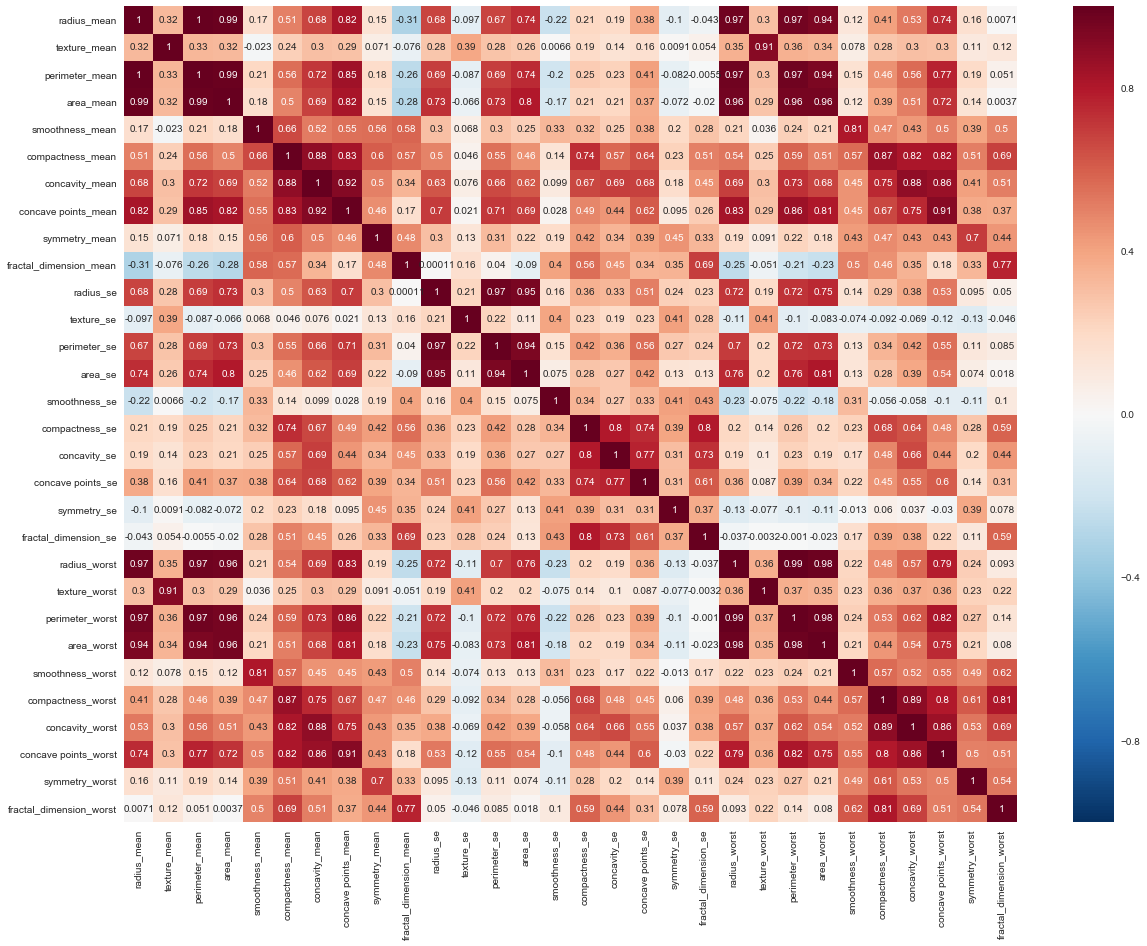

In [142]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.loc[:,df.columns!='id'].corr(),annot=True,ax=ax)

### 5. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).

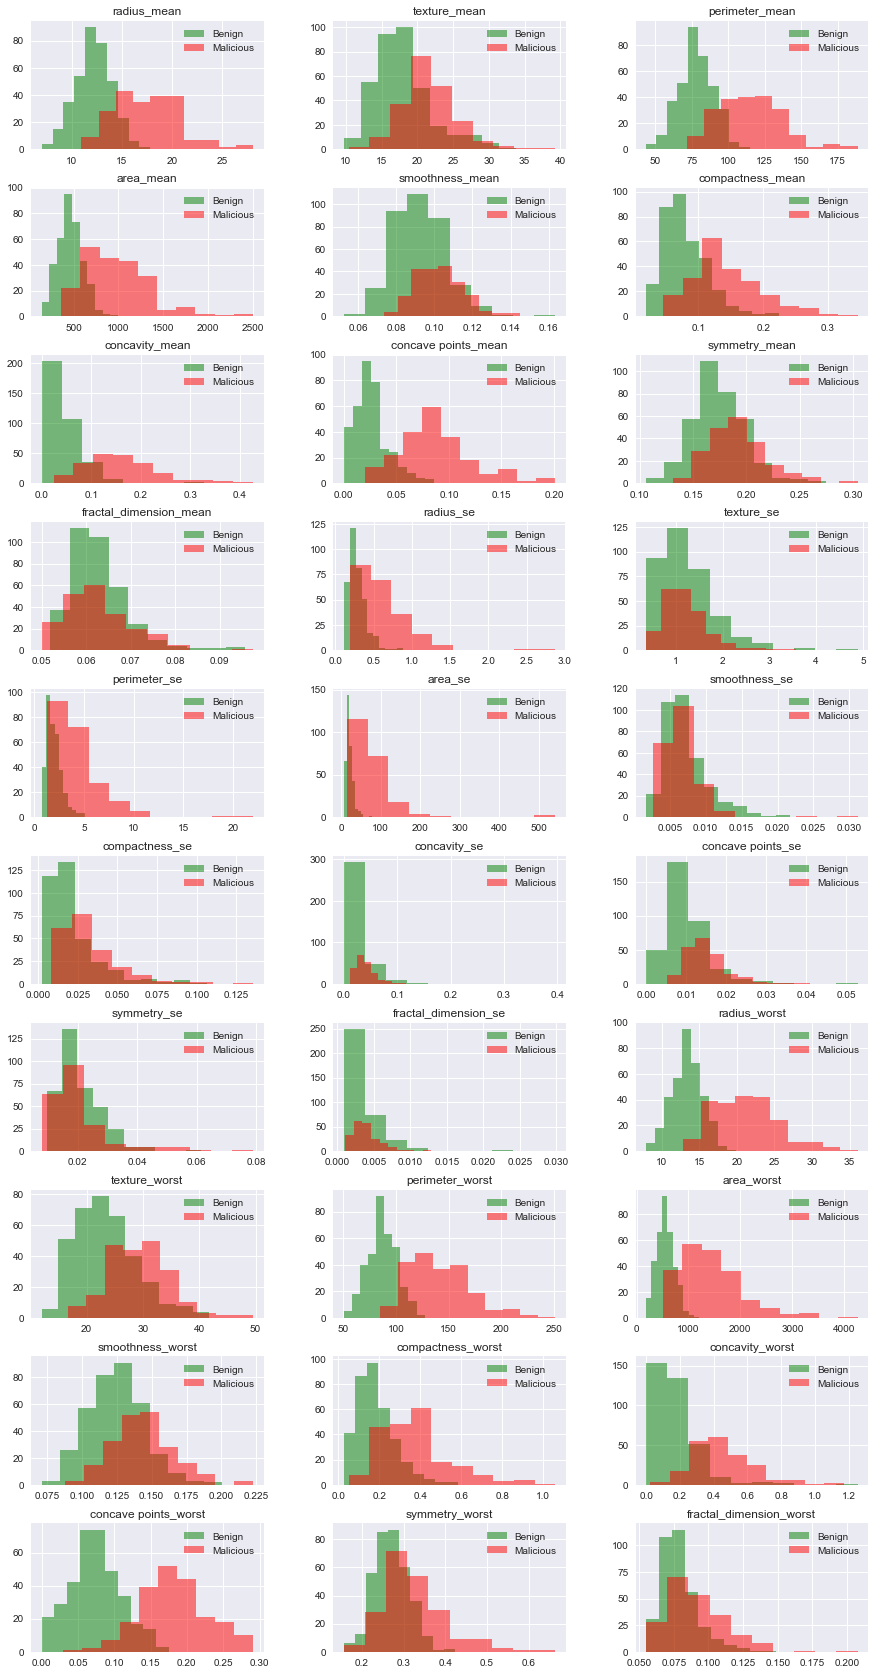

In [140]:
fig, ax  =  plt.subplots(10,3,figsize=(15,30))

for col,axis in zip(df.columns[1:],ax.flatten()):
    df.loc[df['diagnosis']=='B',df.columns!='diagnosis'].hist(column=col,ax=axis,alpha=0.5,color='green',label="Benign")
    df.loc[df['diagnosis']=='M',df.columns!='diagnosis'].hist(column=col,ax=axis,alpha=0.5,color='red',label="Malicious") 
    axis.legend(loc="upper right")

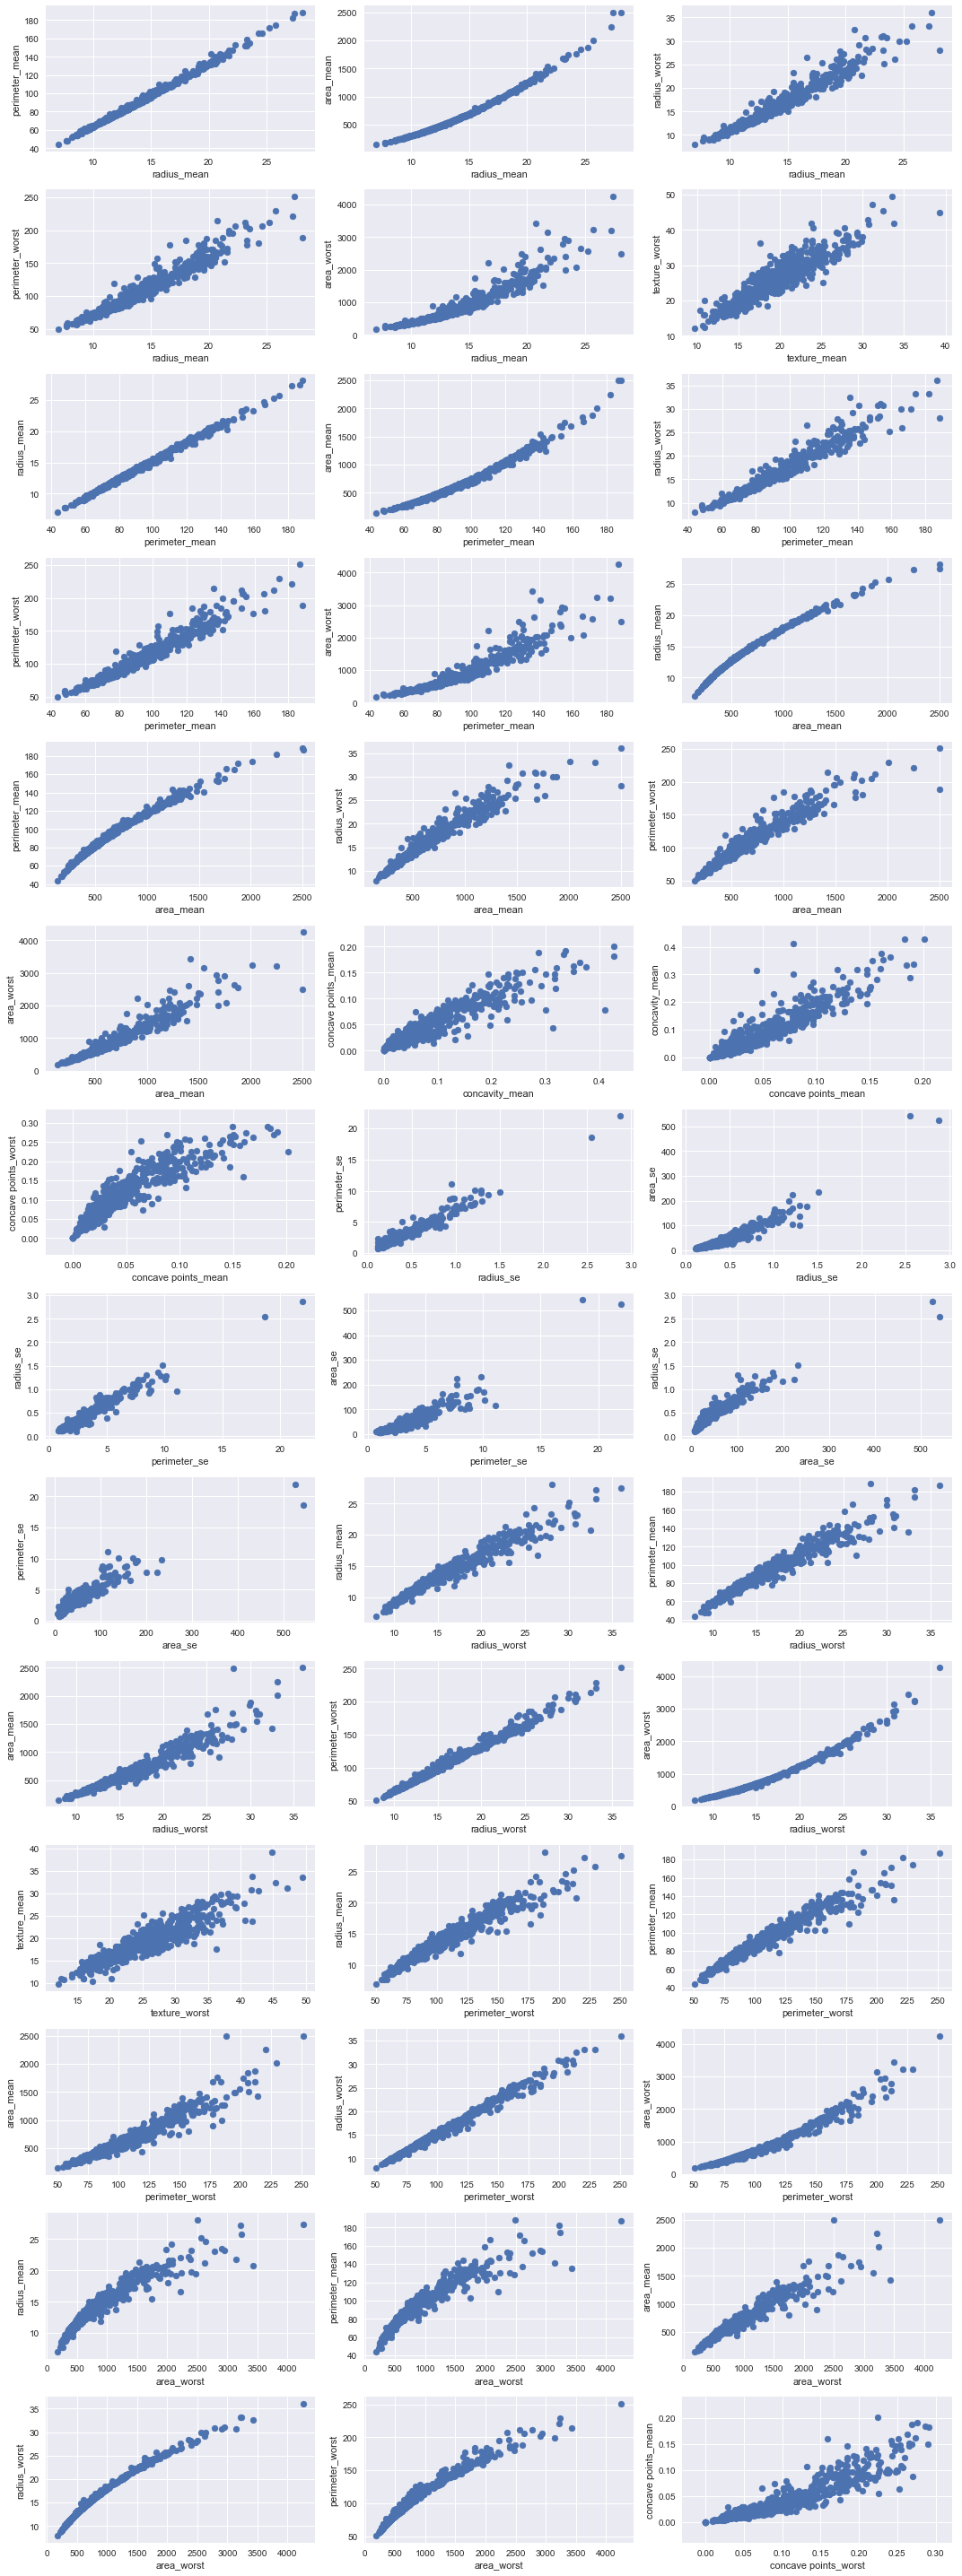

In [188]:
corr=df.corr()
max_cor=corr[corr>0.9].stack()
max_cor[max_cor>0.9]
scatter_graph=[]
for i in range(0,len(max_cor)):
    temp_list=[list(max_cor.index[i])]
    if temp_list[0][0]!=temp_list[0][1]:
        scatter_graph=scatter_graph+temp_list

fig, ax = plt.subplots(14,3,figsize=(15,40))  
for i in range(0,len(scatter_graph)):
    ax[i//3][i%3].scatter(x=scatter_graph[i][0],y=scatter_graph[i][1],data=df)
    ax[i//3][i%3].set_ylabel(scatter_graph[i][1])
    ax[i//3][i%3].set_xlabel(scatter_graph[i][0])
plt.tight_layout()

### 6. С помощью статистических методов проверить взаимосвязи между переменными.

In [191]:
sts.shapiro(df['area_mean'])

(0.8584018349647522, 3.196511088521129e-22)

### 7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при классификации?

### 8. Рассчитать Feature Selection для выбранных переменных.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

X=df.drop(['diagnosis','diagnosis_Y'],axis=1)
X2=sm.add_constant(X)
est=sm.OLS(df.diagnosis_Y,X2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            diagnosis_Y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Thu, 28 Mar 2019   Prob (F-statistic):          6.05e-153
Time:                        15:31:57   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.0218      0.428     -4.724      0.000      -2.863      -1.181
radius_mean                -0.2178      0.174     -1.255      0.210      -0.559       0.123
texture_mean                0.0045      0.008      0.572      0.567      -0.011       0.020
perimeter_mean              0.0237      0.025      0.946      0.345      -0.026       0.073
area_mean                   0.0003      0.001      0.605      0.545      -0.001       0.001
smoothness_mean             0.0847      2.017      0.042      0.967      -3.878       4.047
compactness_mean           -4.2220      1.334     -3.166      0.002      -6.842      -1.602
concavity_mean              1.3980      1.046      1.337      0.182      -0.656       3.452
concave points_mean         2.1418      1.979      1.082      0.280      -1.746       6.030
symmetry_mean               0.1027      0.743      0.138      0.890      -1.356       1.562
fractal_dimension_mean      0.0333      5.572      0.006      0.995     -10.913      10.979
radius_se                   0.4350      0.310      1.401      0.162      -0.175       1.045
texture_se                 -0.0068      0.037     -0.183      0.855      -0.079       0.066
perimeter_se               -0.0225      0.041     -0.548      0.584      -0.103       0.058
area_se                    -0.0009      0.001     -0.660      0.509      -0.004       0.002
smoothness_se              15.8543      6.625      2.393      0.017       2.841      28.868
compactness_se              0.0649      2.169      0.030      0.976      -4.197       4.327
concavity_se               -3.5655      1.301     -2.741      0.006      -6.121      -1.010
concave points_se          10.5680      5.452      1.938      0.053      -0.142      21.278
symmetry_se                 1.6973      2.728      0.622      0.534      -3.661       7.055
fractal_dimension_se       -7.1464     11.676     -0.612      0.541     -30.083      15.791
radius_worst                0.1952      0.058      3.367      0.001       0.081       0.309
texture_worst               0.0072      0.007      1.030      0.303      -0.006       0.021
perimeter_worst            -0.0024      0.006     -0.410      0.682      -0.014       0.009
area_worst                 -0.0010      0.000     -3.163      0.002      -0.002      -0.000
smoothness_worst            0.5429      1.435      0.378      0.705      -2.275       3.361
compactness_worst           0.0672      0.383      0.175      0.861      -0.685       0.820
concavity_worst             0.3812      0.269      1.419      0.156      -0.146       0.909
concave points_worst        0.4643      0.914      0.508      0.612      -1.332       2.260
symmetry_worst              0.5568      0.494      1.126      0.260      -0.414       1.528
fractal_dimension_worst     4.3035      2.383  

### 9. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.

In [45]:
labelencoder_Y=LabelEncoder()
df['diagnosis_Y']=labelencoder_Y.fit_transform(df.diagnosis)

logisticRegr = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(df.drop(['diagnosis','diagnosis_Y'],axis=1),df.diagnosis_Y,test_size=0.25, random_state=0)
logisticRegr.fit(x_train,y_train)
y_pred_log = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test,y_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Logistic Regression score: ",score)


RandomForest = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state = 0)
RandomForest.fit(x_train,y_train)
y_pred_random_forest = RandomForest.predict(x_test)
score = RandomForest.score(x_test,y_test)
print("Random Froest score: ",score)

Logistic Regression score:  0.958041958042
Random Froest score:  0.986013986014


### 10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [52]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("RandomForest")
print(accuracy_score(y_test,y_pred_random_forest))
print(f1_score(y_test,y_pred_random_forest,average="macro"))
print(precision_score(y_test,y_pred_random_forest,average="macro"))
print(recall_score(y_test,y_pred_random_forest,average="macro"))

print("LogisticRegression")
print(accuracy_score(y_test,y_pred_log))
print(f1_score(y_test,y_pred_log,average="macro"))
print(precision_score(y_test,y_pred_log,average="macro"))
print(recall_score(y_test,y_pred_log,average="macro"))

RandomForest
0.986013986014
0.98501048218
0.98501048218
0.98501048218
LogisticRegression
0.958041958042
0.955681818182
0.950326397389
0.962788259958
